# Task 6 - Задание на кластеризацию

По данной ссылке доступны датасеты для выполнения задания.

📂 https://disk.yandex.ru/d/6BtJviqr61w0YA

Можно выполнять на любом или на двух сразу.

##Описания датасетов

**Mall customer** - покупатели универмага

	•	CustomerID – Уникальный идентификатор, присвоенный клиенту
	•	Gender – Пол клиента
	•	Age – Возраст клиента
	•	Annual Income (k$) – Годовой доход клиента (в тысячах долларов)
	•	Spending Score (1-100) – Оценка, присвоенная торговым центром на основе поведения клиента и его привычек тратить деньги

**Credit Card Customer** клиенты банка (продукт кредитных карт)

	•	Customer Serial Identification Number – Серийный идентификационный номер клиента: используется для индексации значений
	•	Customer Key – Ключ клиента
	•	Avg_Credit_Limit – Средний кредитный лимит клиента
	•	Total_Credit_Cards – Общее количество кредитных карт, принадлежащих клиенту
	•	Total_visits_bank – Общее количество посещений банка клиентом
	•	Total_visits_online – Общее количество онлайн-визитов клиента в банк
	•	Total_calls_made – Общее количество звонков клиента в банк

🏁 **Задание: выполнить сегментацию клиентов (с помощью любых двух алгоритмов кластеризации)**. Дайте названия вашим кластерам (метки)

Оценка:

- $3$ балла - выполнена только кластеризация на датасете Mall customer
- $5$ баллов - выполнена только кластеризация на датасете Credit Card Customer
- $10$ баллов - выполнена кластеризация на обоих датасетах

- $+2$ балла за каждый дополнительный метод кластеризации
- $-2$ балла если при работе с датасетом использовался только один метод

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans 

In [126]:
# ваш код здесь
credit_card = pd.read_csv('Credit_Card_Customer_Data.csv')
mall_customer = pd.read_csv('Mall_Customers.csv')


In [127]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [128]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [129]:
mall_customer1 = mall_customer[['Annual Income (k$)','Spending Score (1-100)']]

In [131]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
mall_customer_scaled = scaler.fit_transform(mall_customer1)
 
df_scaled = pd.DataFrame(mall_customer_scaled, columns = mall_customer1.columns)
 
df_scaled.round(2).head()

,Annual Income (k$),Spending Score (1-100)
0,-1.74,-0.43
1,-1.74,1.20
2,-1.70,-1.72
3,-1.70,1.04
4,-1.66,-0.40


In [132]:
X = df_scaled

In [133]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=1, verbose=1)

Initialization complete
Iteration 0, inertia 424.1258653570396.
Iteration 1, inertia 400.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 282.22098391039117.
Iteration 1, inertia 274.2214421406415.
Iteration 2, inertia 273.7885005450477.
Iteration 3, inertia 273.6688866264201.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 216.3309554902724.
Iteration 1, inertia 193.17747090474342.
Iteration 2, inertia 192.23774455632622.
Iteration 3, inertia 191.9116674083647.
Iteration 4, inertia 191.57839391142687.
Iteration 5, inertia 191.2113589598212.
Iteration 6, inertia 190.85114820220363.
Iteration 7, inertia 190.54444879512502.
Iteration 8, inertia 189.47347334552705.
Iteration 9, inertia 188.68094214068094.
Iteration 10, inertia 187.55423266634858.
Iteration 11, inertia 184.6265940831725.
Iteration 12, inertia 181.3714763937627.
Iteration 13, inertia 179.11277486848405.
Iteration 14, inertia 175.66670838

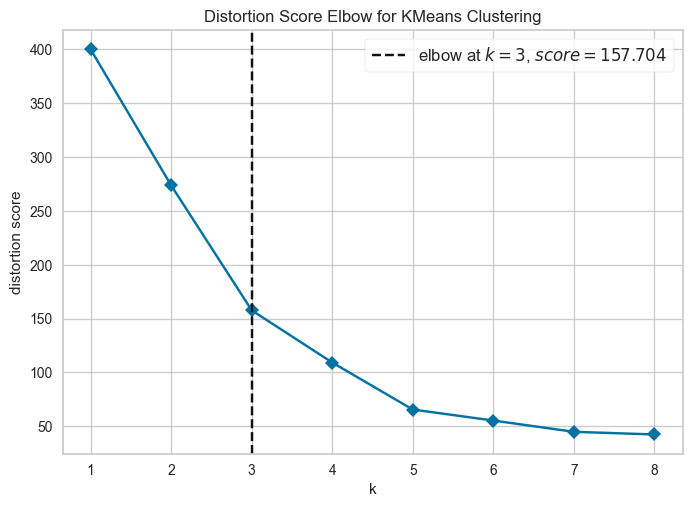

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(1,9), timings=False)

visualizer.fit(X)
visualizer.show()

In [135]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=1, verbose=1)

In [136]:
model.fit(X)

Initialization complete
Iteration 0, inertia 216.3309554902724.
Iteration 1, inertia 193.17747090474342.
Iteration 2, inertia 192.23774455632622.
Iteration 3, inertia 191.9116674083647.
Iteration 4, inertia 191.57839391142687.
Iteration 5, inertia 191.2113589598212.
Iteration 6, inertia 190.85114820220363.
Iteration 7, inertia 190.54444879512502.
Iteration 8, inertia 189.47347334552705.
Iteration 9, inertia 188.68094214068094.
Iteration 10, inertia 187.55423266634858.
Iteration 11, inertia 184.6265940831725.
Iteration 12, inertia 181.3714763937627.
Iteration 13, inertia 179.11277486848405.
Iteration 14, inertia 175.66670838442496.
Iteration 15, inertia 170.56487737770522.
Iteration 16, inertia 164.7450823910358.
Iteration 17, inertia 158.587261556282.
Iteration 18, inertia 157.70400815035947.
Converged at iteration 18: strict convergence.


KMeans(n_clusters=3, random_state=1, verbose=1)

In [137]:
labels = model.predict(X)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [138]:
model.cluster_centers_

array([[ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275],
       [-0.62618966, -0.01439238]])

In [139]:
lables = model.predict(X)
X['claster'] = lables

In [140]:
X

,Annual Income (k$),Spending Score (1-100),claster
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,2
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,0
197,2.497807,0.923953,1
198,2.917671,-1.250054,0


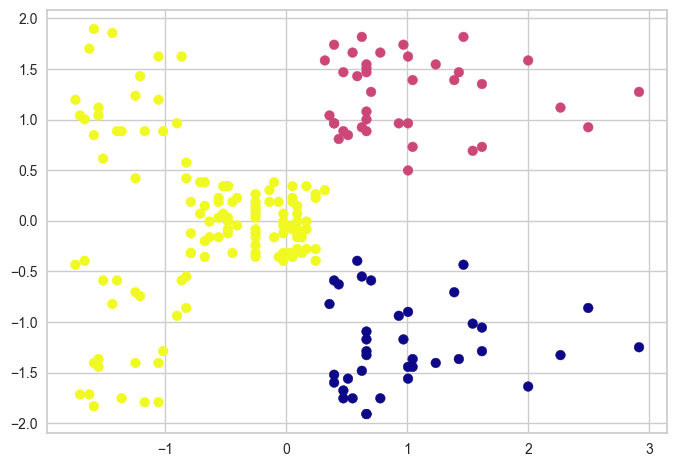

In [141]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c = labels , cmap = "plasma")
plt.show()

# Алгоритм DBSCAN

In [142]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

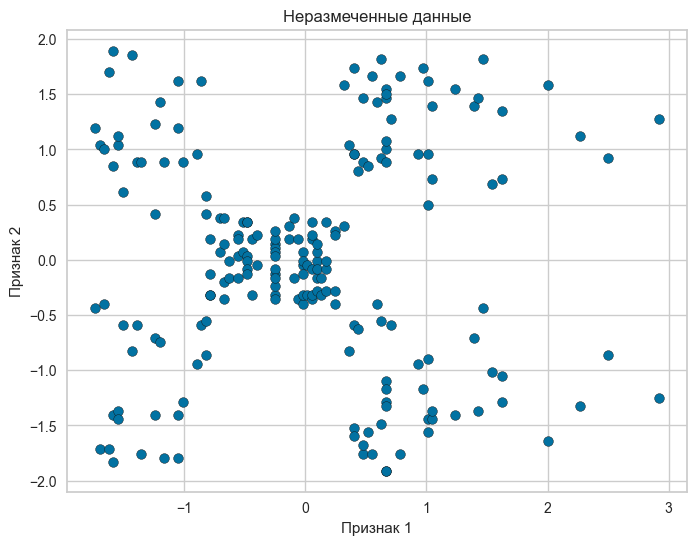

In [143]:
plt.figure(figsize=(8, 6))
plt.scatter(X[['Annual Income (k$)']], X[['Spending Score (1-100)']], edgecolors='k')
plt.title("Неразмеченные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [144]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward') # single , complete, average
labels = model.fit_predict(X)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


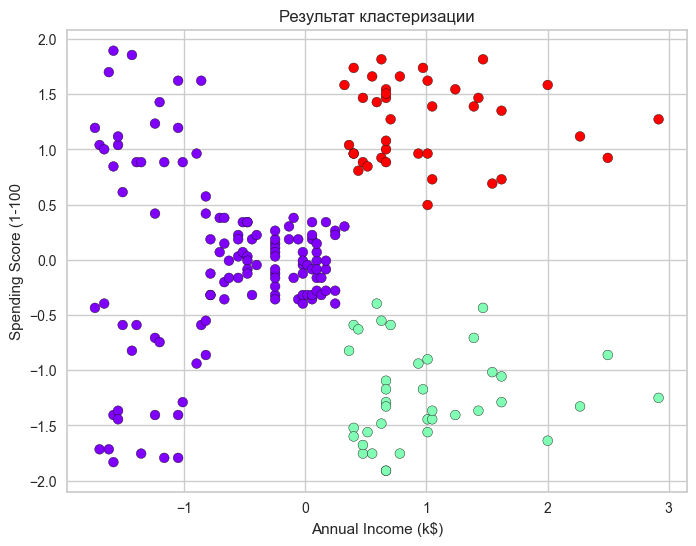

In [145]:
plt.figure(figsize=(8, 6))
plt.scatter(X[['Annual Income (k$)']], X[['Spending Score (1-100)']], c=labels, cmap='rainbow', edgecolors='k')
plt.title("Результат кластеризации")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100")
plt.show()

# **Credit Card Customer** 
клиенты банка (продукт кредитных карт)


In [146]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [147]:
credit_card.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [148]:
credit_card['request'] = credit_card['Total_visits_bank'] + credit_card['Total_visits_online'] + credit_card['Total_calls_made'] + credit_card['Total_Credit_Cards']


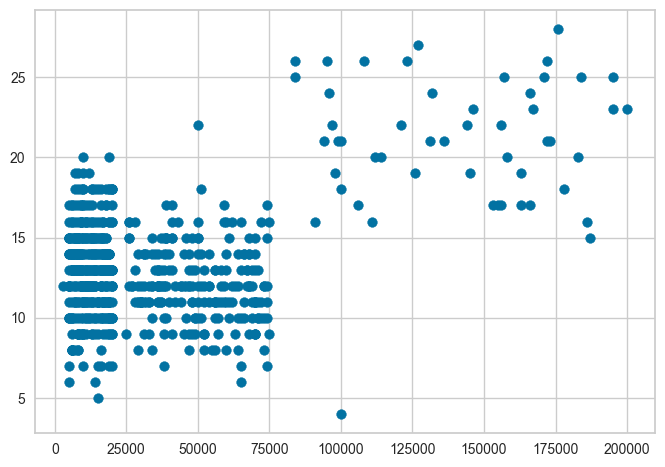

In [149]:
plt.scatter(credit_card[['Avg_Credit_Limit']], credit_card[['request']])

In [150]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
credit_card_scaled = scaler.fit_transform(credit_card)
 
df_scaled = pd.DataFrame(credit_card_scaled, columns = credit_card.columns)
 
df_scaled.round(2).head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,request
0,-1.73,1.25,1.74,-1.25,-0.86,-0.55,-1.25,-2.62
1,-1.72,-0.65,0.41,-0.79,-1.47,2.52,1.89,2.45
2,-1.72,-1.48,0.41,1.06,-0.86,0.13,0.15,0.48
3,-1.71,-0.57,-0.12,0.14,-0.86,-0.55,0.15,-0.65
4,-1.71,-0.30,1.74,0.60,-1.47,3.20,-0.20,2.17


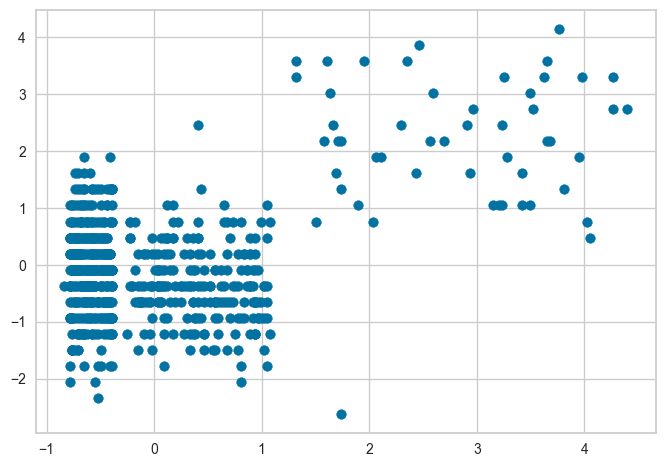

In [151]:
plt.scatter(df_scaled[['Avg_Credit_Limit']], df_scaled[['request']])

In [152]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=1, verbose=1)

Initialization complete
Iteration 0, inertia 6099.3460178550085.
Iteration 1, inertia 5280.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4417.8831827668455.
Iteration 1, inertia 3724.726730515614.
Iteration 2, inertia 3724.0807722106765.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3309.799309519688.
Iteration 1, inertia 2127.7732997372104.
Iteration 2, inertia 2125.43216228039.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2947.186707040619.
Iteration 1, inertia 1872.5316621711067.
Iteration 2, inertia 1853.7081123136004.
Iteration 3, inertia 1845.7175065928518.
Iteration 4, inertia 1843.3559560549274.
Iteration 5, inertia 1842.0696701780744.
Iteration 6, inertia 1841.4805744296414.
Iteration 7, inertia 1841.3564510773913.
Iteration 8, inertia 1841.3139831339622.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, ine

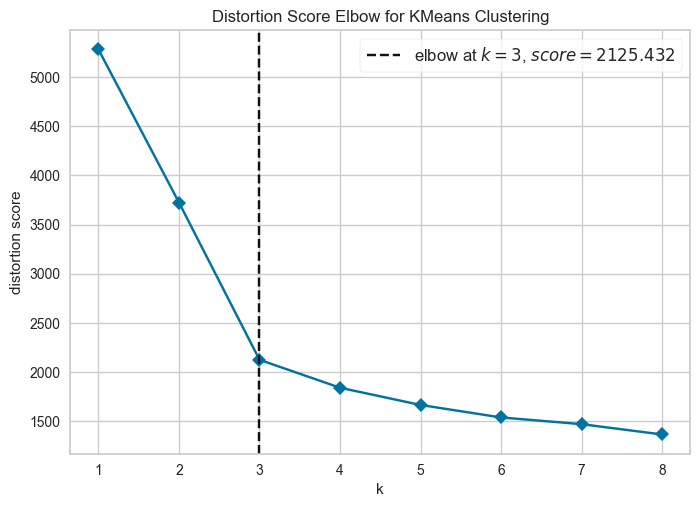

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [153]:
visualizer = KElbowVisualizer(model, k=(1,9), timings=False)

visualizer.fit(df_scaled)
visualizer.show()

In [154]:
model = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state=1, verbose=1)

In [155]:
model.fit(df_scaled)

Initialization complete
Iteration 0, inertia 4417.8831827668455.
Iteration 1, inertia 3724.726730515614.
Iteration 2, inertia 3724.0807722106765.
Converged at iteration 2: strict convergence.


KMeans(n_clusters=2, random_state=1, verbose=1)

In [156]:
labels = model.predict(df_scaled)
labels

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [157]:
model.cluster_centers_

array([[-0.12079627, -0.00501667, -0.23211181, -0.15264149,  0.09063629,
        -0.23174749,  0.07166638, -0.18542856],
       [ 1.4737145 ,  0.06120332,  2.83176409,  1.86222621, -1.10576269,
         2.82731942, -0.87432983,  2.26222849]])

In [158]:
lables = model.predict(df_scaled)
df_scaled['claster'] = lables

In [159]:
df_scaled


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,request,claster
0,-1.729428,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,-2.622360,0
1,-1.724180,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859,2.454002,0
2,-1.718931,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528,0.479861,0
3,-1.713683,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528,-0.648219,0
4,-1.708434,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739,2.171982,1
...,...,...,...,...,...,...,...,...,...
655,1.708434,-0.157505,1.713589,2.443892,-0.860451,2.520519,-1.251537,2.171982,1
656,1.713683,0.218310,1.314621,2.443892,-0.860451,3.543188,-0.553005,3.582083,1
657,1.718931,-0.051055,2.937092,1.520613,-0.860451,2.179629,-0.902271,1.607942,1
658,1.724180,0.996298,3.655235,2.443892,-0.860451,4.224968,-1.251537,3.582083,1


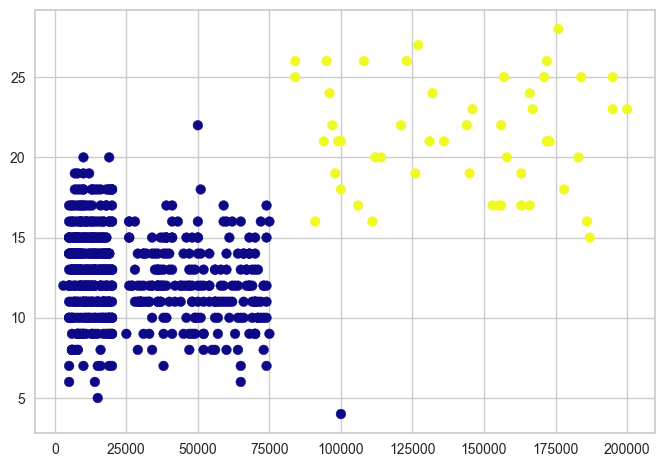

In [160]:
plt.scatter(credit_card[['Avg_Credit_Limit']], credit_card[['request']], c = labels , cmap = "plasma")
plt.show()

# DBscan

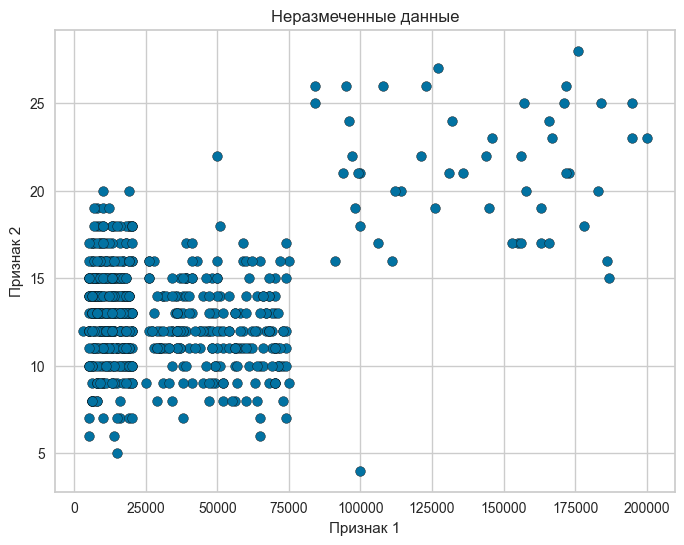

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(credit_card[['Avg_Credit_Limit']], credit_card[['request']], edgecolors='k')
plt.title("Неразмеченные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [162]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = model.fit_predict(credit_card)
print(labels)

[1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

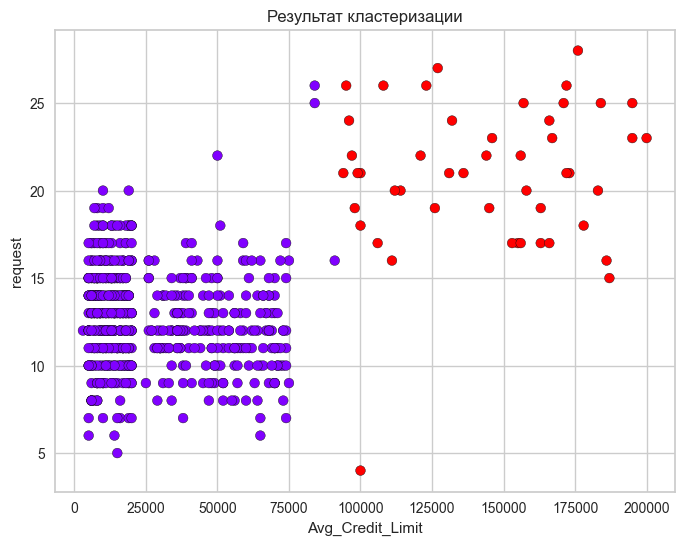

In [163]:
plt.figure(figsize=(8, 6))
plt.scatter(credit_card[['Avg_Credit_Limit']], credit_card[['request']], c=labels, cmap='rainbow', edgecolors='k')
plt.title("Результат кластеризации")
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("request")
plt.show()